MNIST 자료 중 3, 5, 6, 7 에 해당되는 자료만을 선택,       
수업시간에 배운 unsupervised learning 방법 중 5 가지를 이용하여
훈련시키고 각 방법의 성능을 비교하시오.       
각 clustering 방법에서는 최적의 parameter 조합을 이용하고 최적
의 k 를 찾아서 훈련시킬 것             
위의 결과와 자료에서 제공되고 있는 label 을 비교 clustering 이 잘
되지 않는 이상점이 몇 개인지를 확인하고 image 그림을 그려 확인
해보시오

kmeans, k-평균++, 미니배치k-평균, dbscan, 가우시안혼합, 스펙트럼군집

In [71]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [6]:
# load data
mnist = fetch_openml('mnist_784', version=1) 
data = pd.concat([mnist['data'], pd.DataFrame(mnist['target'])], axis=1)
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [14]:
data['class']=data['class'].astype(int)
data=data[data['class'].isin([3,5,6,7])]
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [15]:
data['class'].unique()

array([5, 3, 6, 7])

In [22]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

### k-means
- init = "k-means++", "random" 에 대해 모델 적합 후 정확도가 더 높은 모델을 선택
- n_init=5로 설정하여 5번의 반복중 가장 작은 inertia를 갖는 모델 선택
- n_cluster=1부터 10까지 증가시킨 모델을 이용하여 scree plot을 그리고 가장 적절한 k를 선택

In [66]:
for a in ["k-means++", "random"]:
    m_kmeans = KMeans(n_clusters=4, init=a, n_init=10,
                     algorithm="full", random_state=777)
    y_pred=m_kmeans.fit_predict(X)
    
    data_w_label = pd.concat([data.reset_index(drop=True), 
                              pd.DataFrame(y_pred)], axis=1).rename(columns={0:'label'})
    for n in range(4):
        data_w_label.loc[data_w_label['label']==n,'label']=data_w_label[data_w_label['label']==n]["class"].value_counts().index[0]
    print("accuracy score {} with algorithm={}".format(accuracy_score(y, data_w_label['label']), a))

accuracy score 0.7507149838902364 with algorithm=k-means++
accuracy score 0.5564565760417044 with algorithm=random


두 방법 중 정확도가 더 높은 k-means++ 방법을 선택한다.

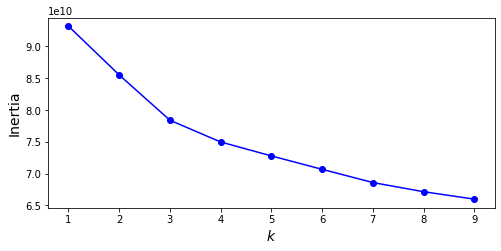

In [69]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=777).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14);